You are tasked with creating two models with the highest possible accuracy based on the Ames Housing Dataset. Those models will predict the following:

- The price of a house at sale (regression)
- Whether a house sale was abnormal or not (classification)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np


from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.feature_selection import RFE, SelectKBest, f_classif, f_regression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV

In [ ]:
%ls

In [2]:
df = pd.read_csv('train_kaggle.csv')

In [3]:
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [4]:
df.shape

(1460, 81)

In [5]:
null = df.isnull().sum()

In [6]:
# Get all the missing values
null[null != 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
# Percentage of all missing values
null[null != 0]/df.shape[0]

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

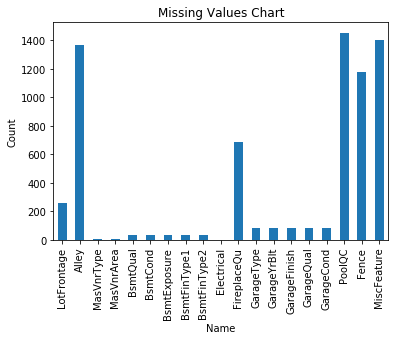

In [8]:
# Plot of missing values
import matplotlib.pyplot as plt
ax = plt.subplot(111)
null[null != 0].plot(ax=ax,kind='bar', title='Missing Values Chart')
plt.xlabel('Name')
plt.ylabel('Count')

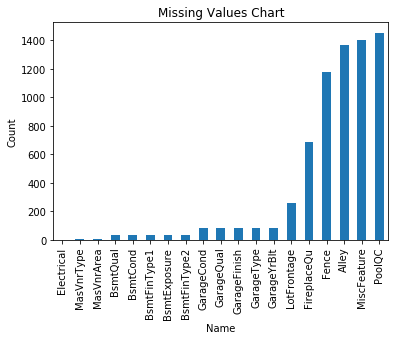

In [9]:
import matplotlib.pyplot as plt
ax = plt.subplot(111)
null[null != 0].sort_values().plot(ax=ax,kind='bar', title='Missing Values Chart')
plt.xlabel('Name')
plt.ylabel('Count')

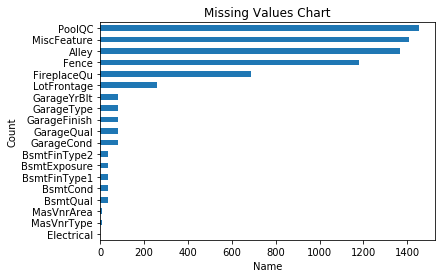

In [10]:
import matplotlib.pyplot as plt
ax = plt.subplot(111)
null[null != 0].sort_values().plot(ax=ax,kind='barh', title='Missing Values Chart')
plt.xlabel('Name')
plt.ylabel('Count')

In [11]:
df_null=null[null != 0]

In [12]:
# Make a dataframe with missing values
x = pd.DataFrame(df_null)

In [13]:
x.shape

(19, 1)

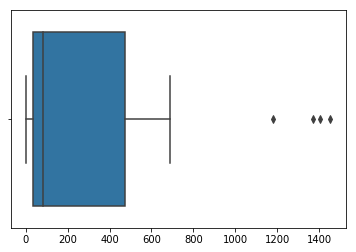

In [14]:
# Plot it
sns.boxplot([vals.dropna() for col, vals in x.iteritems()])

The Boxplot shows that there are 4 outliers (ranging between 1100 and + 1400)

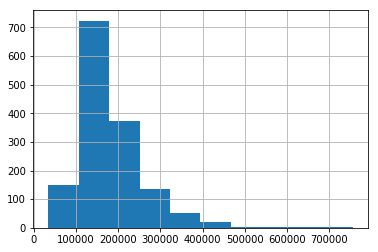

In [15]:
df.SalePrice.hist(bins=10)

Most of the houses price are between 100k and 200k and the distribution is skewed to the right

In [16]:
sale=df.copy()

In [17]:
# Log transformation of the SalePrice
import math
sale['SalePrice']=sale['SalePrice'].apply(lambda x:math.log(x))

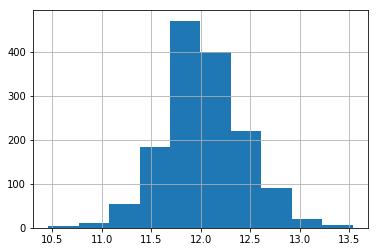

In [18]:
sale.SalePrice.hist(bins=10)

The distribution of the sale price is now normal

In [19]:
df2 = df.copy()

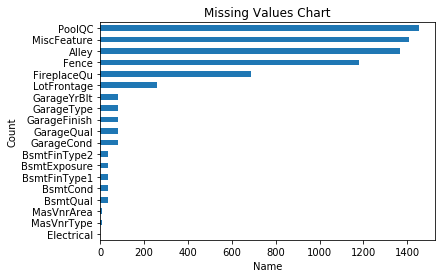

In [20]:
ax = plt.subplot(111)
null[null != 0].sort_values().plot(ax=ax,kind='barh', title='Missing Values Chart')
plt.xlabel('Name')
plt.ylabel('Count')



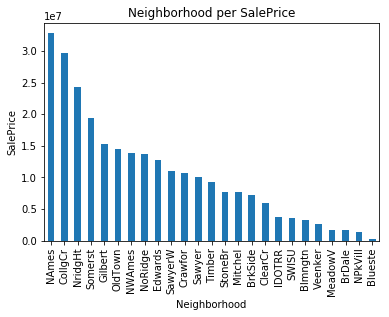

In [21]:
df2.groupby('Neighborhood')['SalePrice'].sum().sort_values(ascending=False).plot(kind='bar',title='Neighborhood per SalePrice')
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice');

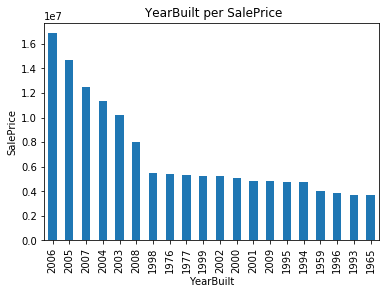

In [22]:
df2.groupby('YearBuilt')['SalePrice'].sum().sort_values(ascending=False).head(20).plot(kind='bar',title=' YearBuilt per SalePrice')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice');

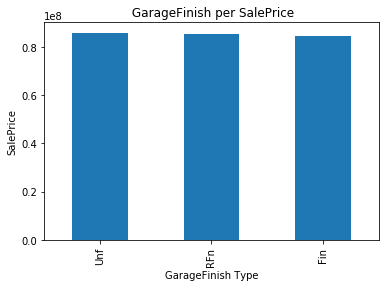

In [23]:
df2.groupby('GarageFinish')['SalePrice'].sum().sort_values(ascending=False).plot(kind='bar',title=' GarageFinish per SalePrice')
plt.xlabel('GarageFinish Type')
plt.ylabel('SalePrice');

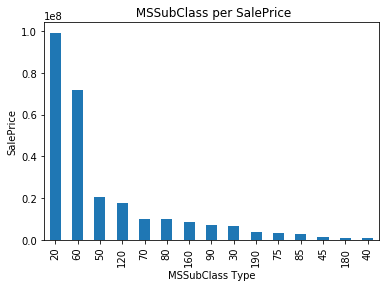

In [24]:
df2.groupby('MSSubClass')['SalePrice'].sum().sort_values(ascending=False).plot(kind='bar',title=' MSSubClass per SalePrice')
plt.xlabel('MSSubClass Type')
plt.ylabel('SalePrice');

20 1-STORY 1946 & NEWER ALL STYLES has the higher price

In [25]:
df.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [26]:
df.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [27]:
df.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [28]:
df3 = df.copy()

In [29]:
df2.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [30]:
null2 = df2.isnull().sum()
null2[null2 != 0]
null2[null2 != 0]/df2.shape[0]

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

### first, let 's drop all features that have at least 20% missing values
### (Alley, FireplaceQu, PoolQC, Fence, MiscFeature)

In [31]:
df2.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis =1, inplace =True)

In [32]:
null2 = df2.isnull().sum()
null2[null2 != 0]
null2[null2 != 0]/df2.shape[0]

LotFrontage     0.177397
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
dtype: float64

In [33]:
df2.MSSubClass.dtypes

dtype('int64')

In [34]:
df2.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [35]:
# Let's change the data type to string
df2.MSSubClass.astype(str)

0        60
1        20
2        60
3        70
4        60
5        50
6        20
7        60
8        50
9       190
10       20
11       60
12       20
13       20
14       20
15       45
16       20
17       90
18       20
19       20
20       60
21       45
22       20
23      120
24       20
25       20
26       20
27       20
28       20
29       30
       ... 
1430     60
1431    120
1432     30
1433     60
1434     20
1435     20
1436     20
1437     20
1438     20
1439     60
1440     70
1441    120
1442     60
1443     30
1444     20
1445     85
1446     20
1447     60
1448     50
1449    180
1450     90
1451     20
1452    180
1453     20
1454     20
1455     60
1456     20
1457     70
1458     20
1459     20
Name: MSSubClass, Length: 1460, dtype: object

In [36]:
df2.MSSubClass.isnull().sum()

0

In [37]:
# let's turn MSSubClass into dummies
df2=pd.get_dummies(df2, columns=['MSSubClass'], drop_first=True)

In [38]:
df2.head()

,Id,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,1,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,1,0,0,0,0,0,0,0,0,0
1,2,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,0,0,0,0
2,3,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,1,0,0,0,0,0,0,0,0,0
3,4,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,1,0,0,0,0,0,0,0,0
4,5,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,1,0,0,0,0,0,0,0,0,0


In [39]:
df2.LotFrontage.dtypes

dtype('float64')

In [40]:
df2.LotFrontage.mean()

70.04995836802665

In [41]:
df2.LotFrontage.mode()

0    60.0
dtype: float64

In [42]:
df2.LotFrontage.median()

69.0

In [43]:
df2.LotFrontage.max()

313.0

In [44]:
df2.LotFrontage.min()

21.0

In [45]:
df2.LotFrontage.isnull().sum()

259

In [46]:
# Fill all empty LotFrontage with the mean
df2["LotFrontage"].fillna(df2.LotFrontage.mean(), inplace=True)

In [47]:
df2.MasVnrType.dtypes

dtype('O')

In [48]:
df2.MasVnrType.isnull().sum()

8

In [49]:
df2.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [50]:
df2.MasVnrType.mode()

0    None
dtype: object

In [51]:
# Fill all empty MasVnrType with None
df2["MasVnrType"].fillna('None', inplace=True)

In [52]:
df2.MasVnrType.isnull().sum()

0

In [53]:
df2 = pd.get_dummies(df2, columns=['MasVnrType'], drop_first=True)

In [ ]:
# # Let create dummies for MasVnrType

# dummies = pd.get_dummies(df2["MasVnrType"],drop_first=True)

# df2_withdummies = pd.concat([df2, dummies], axis=1)


In [54]:
df2.MasVnrArea.dtypes

dtype('float64')

In [55]:
df2.MasVnrArea.mean()

103.68526170798899

In [56]:
df2.MasVnrArea.median()

0.0

In [57]:
# Fill all empty MasVnrArea with the mean
df2["MasVnrArea"].fillna(df2.MasVnrArea.mean(), inplace=True)

In [58]:
df2.BsmtQual.dtypes

dtype('O')

In [59]:
df2.BsmtQual.mode()

0    TA
dtype: object

In [60]:
df2.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [61]:
# Fill all empty BsmtQual with TA
df2["BsmtQual"].fillna('TA', inplace=True)

In [62]:
df2.BsmtQual.isnull().sum()

0

In [63]:
# Then let labelEncode BsmtQual

def Bsmt_Qual(cell):
    if cell =='TA':
        return 1
    elif cell =='Gd':
        return 2
    elif cell == 'Ex':
        return 3
    else:
        return 4
df2['BsmtQual'] =df2['BsmtQual'].map(Bsmt_Qual)

In [64]:
df2.BsmtCond.dtypes

dtype('O')

In [65]:
df2.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [66]:
df2.BsmtCond.mode()

0    TA
dtype: object

In [67]:
# Fill all empty BsmtCond with TA
df2["BsmtCond"].fillna('TA', inplace=True)

In [68]:
df2.BsmtCond.isnull().sum()

0

In [69]:
# Then let labelEncode BsmtCond

def Bsmt_Cond(cell):
    if cell =='TA':
        return 1
    elif cell =='Gd':
        return 2
    elif cell == 'Fa':
        return 3
    else:
        return 4
df2['BsmtCond'] =df2['BsmtCond'].map(Bsmt_Cond)

In [70]:
df2.BsmtCond.isnull().sum()

0

In [71]:
df2.BsmtExposure.dtypes

dtype('O')

In [72]:
df2.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [73]:
df2.BsmtExposure.mode()

0    No
dtype: object

In [74]:
# Fill all empty BsmtExposure with No
df2["BsmtExposure"].fillna('No', inplace=True)

In [75]:
# Then let labelEncode BsmtExposure

def Bsmt_Exposure(cell):
    if cell =='No':
        return 1
    elif cell =='Av':
        return 2
    elif cell == 'Gd':
        return 3
    else:
        return 4
df2['BsmtExposure'] =df2['BsmtExposure'].map(Bsmt_Exposure)

In [76]:
df2.BsmtExposure.isnull().sum()

0

In [77]:
df2.BsmtFinType1.dtypes

dtype('O')

In [78]:
df2.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [79]:
df2.BsmtFinType1.mode()

0    Unf
dtype: object

In [80]:
# Fill all empty BsmtExposure with Unf
df2["BsmtFinType1"].fillna('Unf', inplace=True)

In [81]:
df2.BsmtExposure.isnull().sum()

0

In [82]:
# Let create dummies for BsmtFinType1
df2=pd.get_dummies(df2, columns=['BsmtFinType1'], drop_first=True)

In [83]:
df2.BsmtFinType2.dtypes

dtype('O')

In [84]:
df2.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [85]:
df2.BsmtFinType2.mode()

0    Unf
dtype: object

In [86]:
# Fill all empty BsmtFinType2 with Unf
df2["BsmtFinType2"].fillna('Unf', inplace=True)

In [87]:
# Let create dummies for BsmtFinType2
df2=pd.get_dummies(df2, columns=['BsmtFinType2'], drop_first=True)

In [88]:
df2.Electrical.dtypes

dtype('O')

In [89]:
df2.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [90]:

df2.Electrical.mode()

0    SBrkr
dtype: object

In [91]:
# Fill all empty Electrical with SBrkr
df2["Electrical"].fillna('SBrkr', inplace=True)

In [92]:
# Let create dummies for Electrical
df2=pd.get_dummies(df2, columns=['Electrical'], drop_first=True)

In [93]:
df2.GarageType.dtypes

dtype('O')

In [94]:
df2.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [95]:
df2.GarageType.mode()

0    Attchd
dtype: object

In [96]:
# Fill all empty GarageType with SBrkr
df2["GarageType"].fillna('Attchd', inplace=True)

In [97]:
# Let create dummies for GarageType
df2=pd.get_dummies(df2, columns=['GarageType'], drop_first=True)

In [98]:
df2.GarageYrBlt.dtypes

dtype('float64')

In [99]:
df2.GarageYrBlt.mean()

1978.5061638868744

In [100]:
# Fill all empty GarageYrBlt with the mean
df2["GarageYrBlt"].fillna(df2.GarageYrBlt.mean(), inplace=True)

In [101]:
#df2.GarageYrBlt.value_counts()

In [102]:
df2.GarageFinish.dtypes

dtype('O')

In [103]:
df2.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [104]:
df2.GarageFinish.mode()

0    Unf
dtype: object

In [105]:
# Fill all empty GarageFinish with Unf
df2["GarageFinish"].fillna('Unf', inplace=True)

In [106]:
df2.GarageFinish.isnull().sum()

0

In [107]:
# Let create dummies for GarageFinish
df2=pd.get_dummies(df2, columns=['GarageFinish'], drop_first=True)

In [108]:
df2.GarageQual.dtypes

dtype('O')

In [109]:
df2.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [110]:
df2.GarageQual.mode()

0    TA
dtype: object

In [111]:
# Fill all empty GarageQual with TA
df2["GarageQual"].fillna('TA', inplace=True)

In [112]:
# Then let labelEncode GarageQual

def Garage_Qual(cell):
    if cell =='TA':
        return 1
    elif cell =='Fa':
        return 2
    elif cell == 'Gd':
        return 3
    elif cell == 'Ex':
        return 4
    else:
        return 5
df2['GarageQual'] =df2['GarageQual'].map(Garage_Qual)


In [113]:
df2.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [114]:
df2.GarageCond.mode()

0    TA
dtype: object

In [115]:
# Fill all empty GarageCond with TA
df2["GarageCond"].fillna('TA', inplace=True)

In [116]:
# Then let labelEncode GarageCond

def Garage_Cond(cell):
    if cell =='TA':
        return 1
    elif cell =='Fa':
        return 2
    elif cell == 'Gd':
        return 3
    elif cell == 'Po':
        return 4
    else:
        return 5
df2['GarageCond'] =df2['GarageCond'].map(Garage_Cond)

In [117]:
#df2.dtypes

In [118]:
df2.MSZoning.dtypes

dtype('O')

In [119]:
df2.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [120]:
# Let create dummies for MSZoning
df2=pd.get_dummies(df2, columns=['MSZoning'], drop_first=True)

In [121]:
df2.Street.dtypes

dtype('O')

In [122]:
df2.Street.value_counts()


Pave    1454
Grvl       6
Name: Street, dtype: int64

In [123]:
# Let create dummies for Street
df2=pd.get_dummies(df2, columns=['Street'], drop_first=True)

In [124]:
df2.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [125]:
# Let create dummies for LotShape
df2=pd.get_dummies(df2, columns=['LotShape'], drop_first=True)

In [126]:
df2.LandContour.value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [127]:
# Let create dummies for LandContour
df2=pd.get_dummies(df2, columns=['LandContour'], drop_first=True)


In [128]:
df2.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [129]:
# Let create dummies for Utilities
df2=pd.get_dummies(df2, columns=['Utilities'], drop_first=True)

In [130]:
df2.LotConfig.value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [131]:
# Let create dummies for LotConfig
df2=pd.get_dummies(df2, columns=['LotConfig'], drop_first=True)

In [132]:
df2.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [133]:
# Let labelEncode LandSlope

def Land_Slope(cell):
    if cell =='Gtl':
        return 1
    elif cell =='Mod':
        return 2
    
    else:
        return 3
df2['LandSlope'] =df2['LandSlope'].map(Land_Slope)

In [134]:
df2.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [135]:
# Let create dummies for Neighborhood
df2=pd.get_dummies(df2, columns=['Neighborhood'], drop_first=True)

In [136]:
df2.Condition1.value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [137]:
# Let create dummies for Condition1

df2=pd.get_dummies(df2, columns=['Condition1'], drop_first=True)

In [138]:
df2.Condition2.value_counts()

Norm      1445
Feedr        6
Artery       2
PosN         2
RRNn         2
RRAn         1
PosA         1
RRAe         1
Name: Condition2, dtype: int64

In [139]:
# Let create dummies for Condition2
df2=pd.get_dummies(df2, columns=['Condition2'], drop_first=True)

In [140]:
df2.BldgType.value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [141]:
# Let create dummies for BldgType
df2=pd.get_dummies(df2, columns=['BldgType'], drop_first=True)

In [142]:
df2.HouseStyle.value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [143]:
# Let create dummies for HouseStyle
df2=pd.get_dummies(df2, columns=['HouseStyle'], drop_first=True)

In [144]:
df2.RoofStyle.value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [145]:
# Let create dummies for RoofStyle
df2=pd.get_dummies(df2, columns=['RoofStyle'], drop_first=True)

In [146]:
df2.RoofMatl.value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Metal         1
Roll          1
Membran       1
Name: RoofMatl, dtype: int64

In [147]:
# Let create dummies for RoofMatl
df2=pd.get_dummies(df2, columns=['RoofMatl'], drop_first=True)

In [148]:
df2.RoofMatl.value_counts()

AttributeError: 'DataFrame' object has no attribute 'RoofMatl'

In [149]:
# Let create dummies for Exterior1st
df2=pd.get_dummies(df2, columns=['Exterior1st'], drop_first=True)

In [150]:
df2.Exterior2nd.value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [151]:
# Let create dummies for Exterior2nd
df2=pd.get_dummies(df2, columns=['Exterior2nd'], drop_first=True)

In [152]:
df2.ExterQual.value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [153]:
# Then let labelEncode ExterQual

def Exter_Qual(cell):
    if cell =='TA':
        return 1
    elif cell =='Gd':
        return 2
    elif cell == 'Ex':
        return 3 
    else:
        return 4
df2['ExterQual'] =df2['ExterQual'].map(Exter_Qual)

In [154]:
df2.ExterCond.value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [155]:
# Then let labelEncode ExterCond

def Exter_Cond(cell):
    if cell =='TA':
        return 1
    elif cell =='Gd':
        return 2
    elif cell == 'Fa':
        return 3 
    elif cell =='Ex':
        return 4
    else:
        return 5
df2['ExterCond'] =df2['ExterCond'].map(Exter_Cond)

In [156]:
df2.Foundation.value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [157]:
# Let create dummies for Foundation
df2=pd.get_dummies(df2, columns=['Foundation'], drop_first=True)

In [158]:
df2.KitchenQual.value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [159]:
# Let labelEncode KitchenQual

def Kitchen_Qual(cell):
    if cell =='TA':
        return 1
    elif cell =='Gd':
        return 2
    elif cell == 'Ex':
        return 3 
    else:
        return 4
df2['KitchenQual'] =df2['KitchenQual'].map(Kitchen_Qual)

In [160]:
# Let create dummies for Functional
df2=pd.get_dummies(df2, columns=['Functional'], drop_first=True)

In [161]:
df2.GarageQual.value_counts()

1    1392
2      48
3      14
5       3
4       3
Name: GarageQual, dtype: int64

In [162]:
# Let create dummies for PavedDrive
df2=pd.get_dummies(df2, columns=['PavedDrive'], drop_first=True)

In [163]:
df2.SaleType.value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [164]:
# Let create dummies for SaleType
df2=pd.get_dummies(df2, columns=['SaleType'], drop_first=True)

In [165]:
# Let create dummies for Heating
df2=pd.get_dummies(df2, columns=['Heating'], drop_first=True)

In [166]:
df2.HeatingQC.value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [167]:
# Then let labelEncode HeatingQC

def Heating_QC(cell):
    if cell =='Ex':
        return 1
    elif cell =='TA':
        return 2
    elif cell == 'Gd':
        return 3 
    elif cell=='Fa':
        return 4
    else:
        return 5
df2['HeatingQC'] =df2['HeatingQC'].map(Heating_QC)

In [168]:
df2.shape


(1460, 220)

In [169]:
df2.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [170]:
df2=pd.get_dummies(df2, columns=['CentralAir'], drop_first=True)

In [171]:
df2['TotalSF']=df2[['1stFlrSF','2ndFlrSF']].sum(axis=1)


In [172]:
df2.drop(['1stFlrSF','2ndFlrSF'],axis=1,inplace=True)
df2.columns

Index(['Id', 'LotFrontage', 'LotArea', 'LandSlope', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       ...
       'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'Heating_GasA',
       'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall',
       'CentralAir_Y', 'TotalSF'],
      dtype='object', length=219)

In [173]:
df2.shape

(1460, 219)

In [174]:
df2.columns

Index(['Id', 'LotFrontage', 'LotArea', 'LandSlope', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       ...
       'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'Heating_GasA',
       'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall',
       'CentralAir_Y', 'TotalSF'],
      dtype='object', length=219)

In [175]:
#df2['2ndFlrSF'].value_counts()

In [176]:
df_new = df2.copy()

In [177]:
df_new.drop(['SaleCondition'],axis=1,inplace = True)

In [178]:
df2['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [179]:
df_new.dtypes

Id                       int64
LotFrontage            float64
LotArea                  int64
LandSlope                int64
OverallQual              int64
OverallCond              int64
YearBuilt                int64
YearRemodAdd             int64
MasVnrArea             float64
ExterQual                int64
ExterCond                int64
BsmtQual                 int64
BsmtCond                 int64
BsmtExposure             int64
BsmtFinSF1               int64
BsmtFinSF2               int64
BsmtUnfSF                int64
TotalBsmtSF              int64
HeatingQC                int64
LowQualFinSF             int64
GrLivArea                int64
BsmtFullBath             int64
BsmtHalfBath             int64
FullBath                 int64
HalfBath                 int64
BedroomAbvGr             int64
KitchenAbvGr             int64
KitchenQual              int64
TotRmsAbvGrd             int64
Fireplaces               int64
                        ...   
Exterior2nd_Wd Sdng      uint8
Exterior

In [180]:
df_new.iloc[:,100:120].head(2)

,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [181]:
df_new.iloc[:,0:20].head(2)

,Id,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,LowQualFinSF
0,1,65.0,8450,1,7,5,2003,2003,196.0,2,1,2,1,1,706,0,150,856,1,0
1,2,80.0,9600,1,6,8,1976,1976,0.0,1,1,2,1,3,978,0,284,1262,1,0


In [182]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Break into left and right hand side; y and X
y, X = dmatrices("SalePrice ~ LotFrontage + LotArea + LandSlope + OverallQual + OverallCond + YearBuilt + YearRemodAdd + MasVnrArea + \
                 ExterQual+ ExterCond + BsmtCond + BsmtExposure+BsmtFinSF1+BsmtFinSF2+BsmtUnfSF+TotalBsmtSF+ \
                 HeatingQC+LowQualFinSF+GrLivArea+BsmtFullBath+BsmtHalfBath+FullBath+HalfBath+BedroomAbvGr+KitchenAbvGr+ \
                 KitchenQual+ TotRmsAbvGrd+Fireplaces+GarageYrBlt+GarageCars+GarageArea+GarageQual+GarageCond+WoodDeckSF+ \
                 OpenPorchSF+EnclosedPorch+ScreenPorch+PoolArea+MiscVal+MoSold+YrSold+MSSubClass_30+MSSubClass_40+ \
                 MSSubClass_45+MSSubClass_50+MSSubClass_60+MSSubClass_70+MSSubClass_75+MSSubClass_80+MSSubClass_85+MSSubClass_90+MSSubClass_120+ \
                 MSSubClass_160+MSSubClass_180+MSSubClass_190+MasVnrType_BrkFace+MasVnrType_None+MasVnrType_Stone+BsmtFinType1_BLQ+ \
                 BsmtFinType1_GLQ+BsmtFinType1_LwQ+BsmtFinType1_Rec+BsmtFinType1_Unf+BsmtFinType2_BLQ+BsmtFinType2_GLQ+BsmtFinType2_LwQ+ \
                 BsmtFinType2_Rec+BsmtFinType2_Unf+Electrical_FuseF+Electrical_FuseP+Electrical_Mix+Electrical_SBrkr+GarageType_Attchd+ \
                 GarageType_Basment+GarageType_BuiltIn+GarageType_CarPort+ GarageType_Detchd+GarageFinish_RFn+GarageFinish_Unf+MSZoning_FV+MSZoning_RH+ \
                 MSZoning_RL+MSZoning_RM+Street_Pave+LotShape_IR2+LotShape_IR3+LotShape_Reg+LandContour_HLS+LandContour_Low+LandContour_Lvl+ \
                 Utilities_NoSeWa+LotConfig_CulDSac+LotConfig_FR2+LotConfig_FR3+LotConfig_Inside+Neighborhood_Blueste+Neighborhood_BrDale+ \
                 Neighborhood_BrkSide+Neighborhood_ClearCr+Neighborhood_CollgCr+Neighborhood_Crawfor+Neighborhood_Edwards+Neighborhood_Gilbert+ \
                 Neighborhood_IDOTRR+Neighborhood_MeadowV+Neighborhood_Mitchel+Neighborhood_NAmes+Neighborhood_NPkVill+Neighborhood_NWAmes+ \
                 Neighborhood_NoRidge+Neighborhood_NridgHt+Neighborhood_OldTown+Neighborhood_SWISU+Neighborhood_Sawyer+Neighborhood_SawyerW+ \
                 Neighborhood_Somerst+Neighborhood_StoneBr+Neighborhood_Timber+Neighborhood_Veenker+Condition1_Feedr+Condition1_Norm+Condition1_PosA+ \
                 Condition1_PosN+Condition1_RRAe+Condition1_RRAn+Condition1_RRNe+Condition1_RRNn+Condition2_Feedr+Condition2_Norm+Condition2_PosA+Condition2_PosN+ \
                 Condition2_RRAe+Condition2_RRAn+Condition2_RRNn+BldgType_2fmCon+BldgType_Duplex+BldgType_Twnhs+BldgType_TwnhsE+HouseStyle_1Story+ \
                 HouseStyle_2Story+HouseStyle_SFoyer+HouseStyle_SLvl+RoofStyle_Gable+RoofStyle_Gambrel+RoofStyle_Hip+ \
                 RoofStyle_Mansard+RoofStyle_Shed+RoofMatl_CompShg+RoofMatl_Membran+RoofMatl_Metal+RoofMatl_Roll+RoofMatl_WdShake+ \
                 RoofMatl_WdShngl+Exterior1st_AsphShn+Exterior1st_BrkComm+Exterior1st_BrkFace+Exterior1st_CBlock+Exterior1st_CemntBd+Exterior1st_HdBoard+ \
                 Exterior1st_ImStucc+Exterior1st_MetalSd+Exterior1st_Plywood+Exterior1st_Stone+Exterior1st_Stucco+Exterior1st_VinylSd+ \
                 Exterior1st_WdShing+Exterior2nd_AsphShn+Exterior2nd_BrkFace+Exterior2nd_CBlock+Exterior2nd_CmentBd+ \
                 Exterior2nd_HdBoard+Exterior2nd_ImStucc+Exterior2nd_MetalSd+Exterior2nd_Other+Exterior2nd_Plywood+Exterior2nd_Stone+ \
                 Exterior2nd_Stucco+Exterior2nd_VinylSd+Functional_Maj2+Functional_Min1+Functional_Min2+ \
                 Functional_Mod+Functional_Sev+Functional_Typ+PavedDrive_P+PavedDrive_Y+SaleType_CWD+SaleType_Con+ \
                 SaleType_ConLD+SaleType_ConLI+SaleType_ConLw+SaleType_New+SaleType_Oth+SaleType_WD+Heating_GasA+ \
                 Heating_GasW+Heating_Grav+Heating_OthW+Heating_Wall+CentralAir_Y+TotalSF+Foundation_CBlock+ \
                 Foundation_PConc+Foundation_Slab+Foundation_Stone+Foundation_Wood", 
                 data=df_new, return_type="dataframe")

# For each Xi, calculate VIF
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Fit X to y
result = sm.OLS(y, X).fit()

//anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
//anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [183]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.881     
Dependent Variable:        SalePrice               AIC:                       34163.5918
Date:                      2017-12-05 19:11        BIC:                       35236.6888
No. Observations:          1460                    Log-Likelihood:            -16879.   
Df Model:                  202                     F-statistic:               54.68     
Df Residuals:              1257                    Prob (F-statistic):        0.00      
R-squared:                 0.898                   Scale:                     7.4842e+08
----------------------------------------------------------------------------------------
                        Coef.       Std.Err.      t    P>|t|      [0.025       0.975]   
----------------------------------------------------------------------------------------
Intercept            -214240.5717 1240455.7776 -0.1727 0.8629 -2647832.4858 2219351.3424
LotFrontage              -22.4115      50.3863 -0.4448 0.6565     -121.2620      76.4389
LotArea                    0.4477       0.1118  4.0047 0.0001        0.2284       0.6671
LandSlope               3037.1960    4073.1250  0.7457 0.4560    -4953.6765   11028.0685
OverallQual             9315.4627    1165.7564  7.9909 0.0000     7028.4199   11602.5055
OverallCond             4649.0074     976.5653  4.7606 0.0000     2733.1299    6564.8849
YearBuilt                217.3103      94.9826  2.2879 0.0223       30.9684     403.6521
YearRemodAdd              32.2986      62.2228  0.5191 0.6038      -89.7735     154.3706
MasVnrArea                33.7964       6.7557  5.0026 0.0000       20.5427      47.0501
ExterQual               6728.7990    2109.4039  3.1899 0.0015     2590.4587   10867.1394
ExterCond               -570.2356    2024.7482 -0.2816 0.7783    -4542.4940    3402.0229
BsmtCond               -1822.1335    2093.7734 -0.8703 0.3843    -5929.8091    2285.5421
BsmtExposure            2428.9329     913.5659  2.6587 0.0079      636.6509    4221.2149
BsmtFinSF1                 9.0925       3.1862  2.8537 0.0044        2.8417      15.3433
BsmtFinSF2                -3.9123       6.9335 -0.5643 0.5727      -17.5149       9.6902
BsmtUnfSF                 -3.4724       3.0713 -1.1306 0.2584       -9.4978       2.5530
TotalBsmtSF                1.7078       3.6121  0.4728 0.6364       -5.3786       8.7942
HeatingQC               -852.8638    1107.4437 -0.7701 0.4414    -3025.5056    1319.7779
LowQualFinSF               0.2346      12.3955  0.0189 0.9849      -24.0834      24.5527
GrLivArea                 28.0621       6.7666  4.1472 0.0000       14.7870      41.3371
BsmtFullBath            4340.3203    2320.3212  1.8706 0.0616     -211.8089    8892.4495
BsmtHalfBath            5570.3708    3546.2190  1.5708 0.1165    -1386.7896   12527.5311
FullBath                6264.2315    2599.3739  2.4099 0.0161     1164.6419   11363.8210
HalfBath                3542.2330    2480.9776  1.4278 0.1536    -1325.0803    8409.5463
BedroomAbvGr           -4740.7499    1631.6588 -2.9055 0.0037    -7941.8245   -1539.6752
KitchenAbvGr          -17229.3659    6827.7078 -2.5234 0.0117   -30624.3250   -3834.4068
KitchenQual             3459.2443    1418.0620  2.4394 0.0148      677.2150    6241.2735
TotRmsAbvGrd            2838.0466    1109.5086  2.5579 0.0106      661.3538    5014.7394
Fireplaces              3208.5148    1581.2167  2.0291 0.0427      106.4000    6310.6297
GarageYrBlt               63.7535      63.0356  1.0114 0.3120      -59.9131     187.4202
GarageCars              9031.2058    2548.1526  3.5442 0.0004     4032.1050   14030.3067
GarageArea                -5.6796       8.9899 -0.6318 0.5276      -23.3166      11.9573
GarageQual              1079.0819    3155.6366  0.3420 0.7324   

In [184]:
train_features_final = df2[['LotArea','OverallQual','OverallCond','YearBuilt','MasVnrArea','ExterQual','BsmtExposure','BsmtFinSF1',
            'GrLivArea','BsmtFullBath','FullBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces'
            ,'GarageCars','WoodDeckSF','ScreenPorch','MoSold','BsmtFinType1_GLQ','GarageFinish_RFn','MSZoning_FV',
            'MSZoning_RH','MSZoning_RL','MSZoning_RM','Street_Pave','LotShape_IR3','LandContour_HLS','LandContour_Lvl',
            'Utilities_NoSeWa','LotConfig_CulDSac','Neighborhood_Edwards','Neighborhood_NWAmes','Neighborhood_NoRidge',
            'Neighborhood_NridgHt','Neighborhood_StoneBr','Condition1_Norm','Condition2_PosN','Condition2_RRAe',
            'RoofStyle_Gable','RoofStyle_Gambrel','RoofStyle_Hip','RoofStyle_Mansard','RoofMatl_CompShg','RoofMatl_Membran',
            'RoofMatl_Roll','RoofMatl_WdShake','RoofMatl_WdShngl','Exterior1st_BrkFace','Exterior1st_ImStucc','Exterior2nd_CmentBd',
            'Exterior2nd_ImStucc','Functional_Typ','SaleType_New','TotalSF']]

In [185]:
train_features_final_with_MSSubclass = df2[['LotArea','OverallQual','OverallCond','YearBuilt','MasVnrArea','ExterQual','BsmtExposure','BsmtFinSF1',
            'GrLivArea','BsmtFullBath','FullBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces'
            ,'GarageCars','WoodDeckSF','ScreenPorch','MoSold','BsmtFinType1_GLQ','GarageFinish_RFn','MSZoning_FV',
            'MSZoning_RH','MSZoning_RL','MSZoning_RM','Street_Pave','LotShape_IR3','LandContour_HLS','LandContour_Lvl',
            'Utilities_NoSeWa','LotConfig_CulDSac','Neighborhood_Edwards','Neighborhood_NWAmes','Neighborhood_NoRidge',
            'Neighborhood_NridgHt','Neighborhood_StoneBr','Condition1_Norm','Condition2_PosN','Condition2_RRAe',
            'RoofStyle_Gable','RoofStyle_Gambrel','RoofStyle_Hip','RoofStyle_Mansard','RoofMatl_CompShg','RoofMatl_Membran',
            'RoofMatl_Roll','RoofMatl_WdShake','RoofMatl_WdShngl','Exterior1st_BrkFace','Exterior1st_ImStucc','Exterior2nd_CmentBd',
            'Exterior2nd_ImStucc','Functional_Typ','SaleType_New','TotalSF','MSSubClass_30','MSSubClass_40','MSSubClass_45','MSSubClass_50',
            'MSSubClass_60','MSSubClass_70','MSSubClass_75','MSSubClass_80','MSSubClass_85','MSSubClass_90','MSSubClass_120',
            'MSSubClass_160','MSSubClass_180','MSSubClass_190']]

In [186]:
train_features_final.head(2)

,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,ExterQual,BsmtExposure,BsmtFinSF1,GrLivArea,BsmtFullBath,...,RoofMatl_Roll,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkFace,Exterior1st_ImStucc,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Functional_Typ,SaleType_New,TotalSF
0,8450,7,5,2003,196.0,2,1,706,1710,1,...,0,0,0,0,0,0,0,1,0,1710
1,9600,6,8,1976,0.0,1,3,978,1262,0,...,0,0,0,0,0,0,0,1,0,1262


In [ ]:
# train_features = df2[['MSSubClass','LotFrontage','LotArea','Street','LandContour','LotConfig','Condition1','Condition2',
#             'BldgType','OverallQual','OverallCond','YearBuilt','RoofStyle','RoofMatl','MasVnrType','MasVnrArea'
#             ,'ExterQual','BsmtQual','BsmtExposure','BsmtFinSF1','TotalBsmtSF','GrLivArea','BsmtFullBath',
#             'BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces','GarageCars','WoodDeckSF',
#             'ScreenPorch','TotalSF']]

In [ ]:
# train_features = df2[['MSSubClass_30','MSSubClass_40','MSSubClass_45','MSSubClass_50','MSSubClass_60','MSSubClass_70','MSSubClass_75',
#                       'MSSubClass_80','MSSubClass_85','MSSubClass_90','MSSubClass_120','MSSubClass_160','MSSubClass_180','MSSubClass_190',
#                       'LotFrontage','LotArea','Street','LandContour','LotConfig','Condition1','Condition2',
#             'BldgType','OverallQual','OverallCond','YearBuilt','RoofStyle','RoofMatl','MasVnrType','MasVnrArea'
#             ,'ExterQual','BsmtQual','BsmtExposure','BsmtFinSF1','TotalBsmtSF','GrLivArea','BsmtFullBath',
#             'BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces','GarageCars','WoodDeckSF',
#             'ScreenPorch','TotalSF']]

In [187]:
test= pd.read_csv('test.csv')

In [188]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [189]:
test2= test.copy()

In [190]:
new_cols = [i.replace(' ','') for i in test2.columns]

In [191]:
test2.columns = new_cols

In [192]:
test2.columns

Index(['Id', 'PID', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemod/Add', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

In [193]:
test2.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis =1, inplace =True)

In [194]:
null2 = test2.isnull().sum()
null2[null2 != 0]
null2[null2 != 0]/test2.shape[0]

LotFrontage     0.182025
MasVnrType      0.001138
MasVnrArea      0.001138
BsmtQual        0.028441
BsmtCond        0.028441
BsmtExposure    0.028441
BsmtFinType1    0.028441
BsmtFinType2    0.028441
Electrical      0.001138
GarageType      0.050057
GarageYrBlt     0.051195
GarageFinish    0.051195
GarageQual      0.051195
GarageCond      0.051195
dtype: float64

In [195]:
# Combine 1stFlrSF and 2ndFlrSF into TotalSF
test2['TotalSF']=test2[['1stFlrSF','2ndFlrSF']].sum(axis=1)

In [196]:
test2.drop(['1stFlrSF','2ndFlrSF'],axis=1,inplace=True)
test2.columns

Index(['Id', 'PID', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemod/Add', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'Enclose

In [197]:
#set(X.columns) - set(X_ames_test.columns)

In [198]:
test2.LotFrontage.mean()

69.63004172461753

In [199]:
# Fill all empty LotFrontage with the mean
test2["LotFrontage"].fillna(test2.LotFrontage.mean(), inplace=True)

In [200]:
test2.LotFrontage.isnull().sum()

0

In [201]:
test2.MasVnrType.mode()

0    None
dtype: object

In [202]:
# Fill all empty MasVnrType with None
test2["MasVnrType"].fillna('None', inplace=True)

In [203]:
# Let create dummies for MasVnrType
test2 = pd.get_dummies(test2, columns=['MasVnrType'], drop_first=True)

In [204]:
# Fill all empty MasVnrArea with the mean
test2["MasVnrArea"].fillna(test2.MasVnrArea.mean(), inplace=True)

In [205]:
test2.MasVnrArea.isnull().sum()

0

In [206]:
# Fill all empty BsmtQual with TA
test2["BsmtQual"].fillna('TA', inplace=True)

In [207]:
# Then let labelEncode BsmtQual

def Bsmt_Qual(cell):
    if cell =='TA':
        return 1
    elif cell =='Gd':
        return 2
    elif cell == 'Ex':
        return 3
    else:
        return 4
test2['BsmtQual'] =test2['BsmtQual'].map(Bsmt_Qual)

In [208]:
# Fill all empty BsmtCond with TA
test2["BsmtCond"].fillna('TA', inplace=True)

In [209]:
test2.BsmtCond.isnull().sum()

0

In [210]:
# Then let labelEncode BsmtCond

def Bsmt_Cond(cell):
    if cell =='TA':
        return 1
    elif cell =='Gd':
        return 2
    elif cell == 'Fa':
        return 3
    else:
        return 4
test2['BsmtCond'] =test2['BsmtCond'].map(Bsmt_Cond)

In [211]:
# Fill all empty BsmtExposure with No
test2["BsmtExposure"].fillna('No', inplace=True)

In [212]:
# Then let labelEncode BsmtExposure

def Bsmt_Exposure(cell):
    if cell =='No':
        return 1
    elif cell =='Av':
        return 2
    elif cell == 'Gd':
        return 3
    else:
        return 4
test2['BsmtExposure'] =test2['BsmtExposure'].map(Bsmt_Exposure)

In [213]:
# Fill all empty BsmtExposure with Unf
test2["BsmtFinType1"].fillna('Unf', inplace=True)

In [214]:
# Let create dummies for BsmtFinType1
test2 = pd.get_dummies(test2, columns=['BsmtFinType1'], drop_first=True)

In [215]:
# Fill all empty BsmtFinType2 with Unf
test2["BsmtFinType2"].fillna('Unf', inplace=True)

In [216]:
# Let create dummies for BsmtFinType2
test2 = pd.get_dummies(test2, columns=['BsmtFinType2'], drop_first=True)

In [217]:
# Fill all empty Electrical with SBrkr
test2["Electrical"].fillna('SBrkr', inplace=True)

In [218]:
# Let create dummies for Electrical
test2 = pd.get_dummies(test2, columns=['Electrical'], drop_first=True)

In [219]:
# Fill all empty GarageType with SBrkr
test2["GarageType"].fillna('Attchd', inplace=True)

In [220]:
# Let create dummies for GarageType
test2 = pd.get_dummies(test2, columns=['GarageType'], drop_first=True)

In [221]:
# Fill all empty GarageYrBlt with the mean
test2["GarageYrBlt"].fillna(test2.GarageYrBlt.mean(), inplace=True)

In [222]:
# Fill all empty GarageFinish with Unf
test2["GarageFinish"].fillna('Unf', inplace=True)

In [223]:
# Let create dummies for GarageFinish
test2 = pd.get_dummies(test2, columns=['GarageFinish'], drop_first=True)

In [224]:
# Fill all empty GarageQual with TA
test2["GarageQual"].fillna('TA', inplace=True)

In [225]:
# Then let labelEncode GarageQual

def Garage_Qual(cell):
    if cell =='TA':
        return 1
    elif cell =='Fa':
        return 2
    elif cell == 'Gd':
        return 3
    elif cell == 'Ex':
        return 4
    else:
        return 5
test2['GarageQual'] =test2['GarageQual'].map(Garage_Qual)

In [226]:
# Fill all empty GarageCond with TA
test2["GarageCond"].fillna('TA', inplace=True)

In [227]:
# Then let labelEncode GarageCond

def Garage_Cond(cell):
    if cell =='TA':
        return 1
    elif cell =='Fa':
        return 2
    elif cell == 'Gd':
        return 3
    elif cell == 'Po':
        return 4
    else:
        return 5
test2['GarageCond'] =test2['GarageCond'].map(Garage_Cond)

In [228]:
# Let create dummies for MSZoning
test2 = pd.get_dummies(test2, columns=['MSZoning'], drop_first=True)

In [229]:
# Let create dummies for Street
test2 = pd.get_dummies(test2, columns=['Street'], drop_first=True)

In [230]:
# Let create dummies for LotShape
test2 = pd.get_dummies(test2, columns=['LotShape'], drop_first=True)

In [231]:
# Let create dummies for LandContour
test2 = pd.get_dummies(test2, columns=['LandContour'], drop_first=True)


In [232]:
# Let create dummies for Utilities
test2 = pd.get_dummies(test2, columns=['Utilities'], drop_first=True)

In [233]:
# Let create dummies for LotConfig
test2 = pd.get_dummies(test2, columns=['LotConfig'], drop_first=True)

In [234]:
# Let labelEncode LandSlope

def Land_Slope(cell):
    if cell =='Gtl':
        return 1
    elif cell =='Mod':
        return 2
    
    else:
        return 3
test2['LandSlope'] =test2['LandSlope'].map(Land_Slope)

In [235]:
# Let create dummies for Neighborhood
test2 = pd.get_dummies(test2, columns=['Neighborhood'], drop_first=True)

In [236]:
# Let create dummies for Condition1
test2 = pd.get_dummies(test2, columns=['Condition1'], drop_first=True)


In [237]:
# Let create dummies for Condition2
test2 = pd.get_dummies(test2, columns=['Condition2'], drop_first=True)

In [238]:
# Let create dummies for BldgType
test2 = pd.get_dummies(test2, columns=['BldgType'], drop_first=True)

In [239]:
# Let create dummies for HouseStyle
test2 = pd.get_dummies(test2, columns=['HouseStyle'], drop_first=True)

In [240]:
# Let create dummies for RoofStyle
test2 = pd.get_dummies(test2, columns=['RoofStyle'], drop_first=True)

In [241]:
# Let create dummies for RoofMatl
test2 = pd.get_dummies(test2, columns=['RoofMatl'], drop_first=True)

In [242]:
# Let create dummies for Exterior1st
test2 = pd.get_dummies(test2, columns=['Exterior1st'], drop_first=True)

In [243]:
# Let create dummies for Exterior2nd
test2 = pd.get_dummies(test2, columns=['Exterior2nd'], drop_first=True)

In [244]:
# Then let labelEncode ExterQual

def Exter_Qual(cell):
    if cell =='TA':
        return 1
    elif cell =='Gd':
        return 2
    elif cell == 'Ex':
        return 3 
    else:
        return 4
test2['ExterQual'] =test2['ExterQual'].map(Exter_Qual)

In [245]:
# Then let labelEncode ExterCond

def Exter_Cond(cell):
    if cell =='TA':
        return 1
    elif cell =='Gd':
        return 2
    elif cell == 'Fa':
        return 3 
    elif cell =='Ex':
        return 4
    else:
        return 5
test2['ExterCond'] =test2['ExterCond'].map(Exter_Cond)

In [246]:
# Let create dummies for Foundation
test2 = pd.get_dummies(test2, columns=['Foundation'], drop_first=True)

In [247]:
# Let labelEncode KitchenQual

def Kitchen_Qual(cell):
    if cell =='TA':
        return 1
    elif cell =='Gd':
        return 2
    elif cell == 'Ex':
        return 3 
    else:
        return 4
test2['KitchenQual'] =test2['KitchenQual'].map(Kitchen_Qual)

In [248]:
# Let create dummies for Functional
test2 = pd.get_dummies(test2, columns=['Functional'], drop_first=True)

In [249]:
# Let create dummies for PavedDrive
test2 = pd.get_dummies(test2, columns=['PavedDrive'], drop_first=True)

In [250]:
# Let create dummies for SaleType
test2 = pd.get_dummies(test2, columns=['SaleType'], drop_first=True)

In [251]:
# Let create dummies for Heating
test2 = pd.get_dummies(test2, columns=['Heating'], drop_first=True)

In [252]:
# Then let labelEncode HeatingQC

def Heating_QC(cell):
    if cell =='Ex':
        return 1
    elif cell =='TA':
        return 2
    elif cell == 'Gd':
        return 3 
    elif cell=='Fa':
        return 4
    else:
        return 5
test2['HeatingQC'] =test2['HeatingQC'].map(Heating_QC)

In [253]:
test2 = pd.get_dummies(test2, columns=['CentralAir'], drop_first=True)

In [254]:
test2.head(2)

,Id,PID,MSSubClass,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemod/Add,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,Heating_GasA,Heating_GasW,Heating_Grav,CentralAir_Y
0,2658,902301120,190,69.000000,9142,1,6,8,1910,1950,...,0,0,0,0,0,1,1,0,0,0
1,2718,905108090,90,69.630042,9662,1,5,4,1977,1977,...,0,0,0,0,0,1,1,0,0,1


In [255]:
# Let's change the data type to string
test2.MSSubClass.astype(str)

0      190
1       90
2       60
3       30
4       20
5      160
6       20
7       20
8      160
9       20
10     120
11      30
12      20
13      90
14      70
15      20
16     190
17      20
18      20
19      70
20      20
21      20
22     120
23      80
24      20
25      20
26      50
27      70
28      85
29      50
      ... 
849    160
850     80
851    120
852     20
853     20
854     90
855     50
856     50
857    120
858    180
859     60
860     20
861     20
862    120
863    160
864     20
865     90
866     60
867     20
868    160
869     90
870     20
871     20
872     20
873     20
874     60
875     60
876     20
877     20
878     20
Name: MSSubClass, Length: 879, dtype: object

In [256]:
test2=pd.get_dummies(test2, columns=['MSSubClass'], drop_first=True)

In [257]:
set(df_new) - set(test2)

{'Condition2_Feedr',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'Electrical_Mix',
 'Exterior1st_CBlock',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Stone',
 'Functional_Sev',
 'Heating_OthW',
 'Heating_Wall',
 'RoofMatl_CompShg',
 'RoofMatl_Membran',
 'SalePrice',
 'SaleType_WD',
 'Utilities_NoSeWa',
 'YearRemodAdd'}

In [258]:
test2.columns

Index(['Id', 'PID', 'LotFrontage', 'LotArea', 'LandSlope', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemod/Add', 'MasVnrArea',
       ...
       'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80',
       'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160',
       'MSSubClass_180', 'MSSubClass_190'],
      dtype='object', length=210)

In [259]:
null2 = test2.isnull().sum()
null2[null2 != 0]
null2[null2 != 0]/test2.shape[0]

Series([], dtype: float64)

In [260]:
# train_features = df2[['MSSubClass','LotFrontage','LotArea','Street','LandContour','LotConfig','Condition1','Condition2',
#             'BldgType','OverallQual','OverallCond','YearBuilt','RoofStyle','RoofMatl','MasVnrType','MasVnrArea'
#             ,'ExterQual','BsmtQual','BsmtExposure','BsmtFinSF1','TotalBsmtSF','GrLivArea','BsmtFullBath',
#             'BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces','GarageCars','WoodDeckSF',
#             'ScreenPorch','TotalSF','SalePrice']]

In [261]:
train_features_final = df2[['LotArea','OverallQual','OverallCond','YearBuilt','MasVnrArea','ExterQual','BsmtExposure','BsmtFinSF1',
            'GrLivArea','BsmtFullBath','FullBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces'
            ,'GarageCars','WoodDeckSF','ScreenPorch','MoSold','BsmtFinType1_GLQ','GarageFinish_RFn','MSZoning_FV',
            'MSZoning_RH','MSZoning_RL','MSZoning_RM','Street_Pave','LotShape_IR3','LandContour_HLS','LandContour_Lvl',
            'LotConfig_CulDSac','Neighborhood_Edwards','Neighborhood_NWAmes','Neighborhood_NoRidge',
            'Neighborhood_NridgHt','Neighborhood_StoneBr','Condition1_Norm','Condition2_PosN',
            'RoofStyle_Gable','RoofStyle_Gambrel','RoofStyle_Hip','RoofStyle_Mansard',
            'RoofMatl_Roll','RoofMatl_WdShake','RoofMatl_WdShngl','Exterior1st_BrkFace','Exterior2nd_CmentBd',
            'Functional_Typ','SaleType_New','TotalSF','SalePrice']]

In [262]:
train_features_final_MSSubClass = df2[['LotArea','OverallQual','OverallCond','YearBuilt','MasVnrArea','ExterQual','BsmtExposure','BsmtFinSF1',
            'GrLivArea','BsmtFullBath','FullBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces'
            ,'GarageCars','WoodDeckSF','ScreenPorch','MoSold','BsmtFinType1_GLQ','GarageFinish_RFn','MSZoning_FV',
            'MSZoning_RH','MSZoning_RL','MSZoning_RM','Street_Pave','LotShape_IR3','LandContour_HLS','LandContour_Lvl',
            'LotConfig_CulDSac','Neighborhood_Edwards','Neighborhood_NWAmes','Neighborhood_NoRidge',
            'Neighborhood_NridgHt','Neighborhood_StoneBr','Condition1_Norm','Condition2_PosN',
            'RoofStyle_Gable','RoofStyle_Gambrel','RoofStyle_Hip','RoofStyle_Mansard',
            'RoofMatl_Roll','RoofMatl_WdShake','RoofMatl_WdShngl','Exterior1st_BrkFace','Exterior2nd_CmentBd',
            'Functional_Typ','SaleType_New','TotalSF','SalePrice','MSSubClass_30','MSSubClass_40','MSSubClass_45','MSSubClass_50',
            'MSSubClass_60','MSSubClass_70','MSSubClass_75','MSSubClass_80','MSSubClass_85','MSSubClass_90','MSSubClass_120',
            'MSSubClass_160','MSSubClass_180','MSSubClass_190']]

In [263]:
train_features_final_MSSubClass_No_Neighbhor = df2[['LotArea','OverallQual','OverallCond','YearBuilt','MasVnrArea','ExterQual','BsmtExposure','BsmtFinSF1',
            'GrLivArea','BsmtFullBath','FullBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces'
            ,'GarageCars','WoodDeckSF','ScreenPorch','MoSold','BsmtFinType1_GLQ','GarageFinish_RFn','MSZoning_FV',
            'MSZoning_RH','MSZoning_RL','MSZoning_RM','Street_Pave','LotShape_IR3','LandContour_HLS','LandContour_Lvl',
            'LotConfig_CulDSac','Condition1_Norm','Condition2_PosN',
            'RoofStyle_Gable','RoofStyle_Gambrel','RoofStyle_Hip','RoofStyle_Mansard',
            'RoofMatl_Roll','RoofMatl_WdShake','RoofMatl_WdShngl','Exterior1st_BrkFace','Exterior2nd_CmentBd',
            'Functional_Typ','SaleType_New','TotalSF','SalePrice','MSSubClass_30','MSSubClass_40','MSSubClass_45','MSSubClass_50',
            'MSSubClass_60','MSSubClass_70','MSSubClass_75','MSSubClass_80','MSSubClass_85','MSSubClass_90','MSSubClass_120',
            'MSSubClass_160','MSSubClass_180','MSSubClass_190']]

In [264]:
# test2_features = test2[['MSSubClass','LotFrontage','LotArea','Street','LandContour','LotConfig','Condition1','Condition2',
#             'BldgType','OverallQual','OverallCond','YearBuilt','RoofStyle','RoofMatl','MasVnrType','MasVnrArea'
#             ,'ExterQual','BsmtQual','BsmtExposure','BsmtFinSF1','TotalBsmtSF','GrLivArea','BsmtFullBath',
#             'BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces','GarageCars','WoodDeckSF',
#             'ScreenPorch','TotalSF']]

In [265]:
test_features_final = test2[['LotArea','OverallQual','OverallCond','YearBuilt','MasVnrArea','ExterQual','BsmtExposure','BsmtFinSF1',
            'GrLivArea','BsmtFullBath','FullBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces'
            ,'GarageCars','WoodDeckSF','ScreenPorch','MoSold','BsmtFinType1_GLQ','GarageFinish_RFn','MSZoning_FV',
            'MSZoning_RH','MSZoning_RL','MSZoning_RM','Street_Pave','LotShape_IR3','LandContour_HLS','LandContour_Lvl',
            'LotConfig_CulDSac','Neighborhood_Edwards','Neighborhood_NWAmes','Neighborhood_NoRidge',
            'Neighborhood_NridgHt','Neighborhood_StoneBr','Condition1_Norm','Condition2_PosN',
            'RoofStyle_Gable','RoofStyle_Gambrel','RoofStyle_Hip','RoofStyle_Mansard',
            'RoofMatl_Roll','RoofMatl_WdShake','RoofMatl_WdShngl','Exterior1st_BrkFace','Exterior2nd_CmentBd',
            'Functional_Typ','SaleType_New','TotalSF']]

In [266]:
test_features_final_MSSubClass = test2[['LotArea','OverallQual','OverallCond','YearBuilt','MasVnrArea','ExterQual','BsmtExposure','BsmtFinSF1',
            'GrLivArea','BsmtFullBath','FullBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces'
            ,'GarageCars','WoodDeckSF','ScreenPorch','MoSold','BsmtFinType1_GLQ','GarageFinish_RFn','MSZoning_FV',
            'MSZoning_RH','MSZoning_RL','MSZoning_RM','Street_Pave','LotShape_IR3','LandContour_HLS','LandContour_Lvl',
            'LotConfig_CulDSac','Neighborhood_Edwards','Neighborhood_NWAmes','Neighborhood_NoRidge',
            'Neighborhood_NridgHt','Neighborhood_StoneBr','Condition1_Norm','Condition2_PosN',
            'RoofStyle_Gable','RoofStyle_Gambrel','RoofStyle_Hip','RoofStyle_Mansard',
            'RoofMatl_Roll','RoofMatl_WdShake','RoofMatl_WdShngl','Exterior1st_BrkFace','Exterior2nd_CmentBd',
            'Functional_Typ','SaleType_New','TotalSF','MSSubClass_30','MSSubClass_40','MSSubClass_45','MSSubClass_50',
            'MSSubClass_60','MSSubClass_70','MSSubClass_75','MSSubClass_80','MSSubClass_85','MSSubClass_90','MSSubClass_120',
            'MSSubClass_160','MSSubClass_180','MSSubClass_190']]

In [267]:
test_features_final_MSSubClass_No_Neighbor = test2[['LotArea','OverallQual','OverallCond','YearBuilt','MasVnrArea','ExterQual','BsmtExposure','BsmtFinSF1',
            'GrLivArea','BsmtFullBath','FullBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces'
            ,'GarageCars','WoodDeckSF','ScreenPorch','MoSold','BsmtFinType1_GLQ','GarageFinish_RFn','MSZoning_FV',
            'MSZoning_RH','MSZoning_RL','MSZoning_RM','Street_Pave','LotShape_IR3','LandContour_HLS','LandContour_Lvl',
            'LotConfig_CulDSac','Condition1_Norm','Condition2_PosN',
            'RoofStyle_Gable','RoofStyle_Gambrel','RoofStyle_Hip','RoofStyle_Mansard',
            'RoofMatl_Roll','RoofMatl_WdShake','RoofMatl_WdShngl','Exterior1st_BrkFace','Exterior2nd_CmentBd',
            'Functional_Typ','SaleType_New','TotalSF','MSSubClass_30','MSSubClass_40','MSSubClass_45','MSSubClass_50',
            'MSSubClass_60','MSSubClass_70','MSSubClass_75','MSSubClass_80','MSSubClass_85','MSSubClass_90','MSSubClass_120',
            'MSSubClass_160','MSSubClass_180','MSSubClass_190']]

In [268]:
set(train_features_final_MSSubClass)-set(test_features_final_MSSubClass)

{'SalePrice'}

In [269]:
set(train_features_final_MSSubClass_No_Neighbhor)-set(test_features_final_MSSubClass_No_Neighbor)

{'SalePrice'}

In [270]:
set(train_features_final)-set(test_features_final)

{'SalePrice'}

In [271]:
train_features_final2=train_features_final.copy()

In [272]:
train_features_final_MSSubClass2=train_features_final_MSSubClass.copy()

In [273]:
test_features_final_MSSubClass2=test_features_final_MSSubClass.copy()

In [274]:
test_features_final_MSSubClass_No_Neighbor2=test_features_final_MSSubClass_No_Neighbor.copy()

In [275]:
train_features_final_MSSubClass_No_Neighbhor2=train_features_final_MSSubClass_No_Neighbhor.copy()

In [ ]:
#log transform SalePrice
import math
train_features_final2['SalePrice']=train_features_final2['SalePrice'].apply(lambda x:math.log(x))

In [ ]:
#Xtest= test2[['MSSubClass','LotFrontage','LotArea','Street','LandContour','LotConfig','Condition1','Condition2',
#             'BldgType','OverallQual','OverallCond','YearBuilt','RoofStyle','RoofMatl','MasVnrType','MasVnrArea'
#             ,'ExterQual','BsmtQual','BsmtExposure','BsmtFinSF1','TotalBsmtSF','GrLivArea','BsmtFullBath',
#             'BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces','GarageCars','WoodDeckSF',
#             'ScreenPorch','TotalSF']] 

In [276]:
Xtest= test_features_final[['LotArea','OverallQual','OverallCond','YearBuilt','MasVnrArea','ExterQual','BsmtExposure','BsmtFinSF1',
            'GrLivArea','BsmtFullBath','FullBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces'
            ,'GarageCars','WoodDeckSF','ScreenPorch','MoSold','BsmtFinType1_GLQ','GarageFinish_RFn','MSZoning_FV',
            'MSZoning_RH','MSZoning_RL','MSZoning_RM','Street_Pave','LotShape_IR3','LandContour_HLS','LandContour_Lvl',
            'LotConfig_CulDSac','Neighborhood_Edwards','Neighborhood_NWAmes','Neighborhood_NoRidge',
            'Neighborhood_NridgHt','Neighborhood_StoneBr','Condition1_Norm','Condition2_PosN',
            'RoofStyle_Gable','RoofStyle_Gambrel','RoofStyle_Hip','RoofStyle_Mansard',
            'RoofMatl_Roll','RoofMatl_WdShake','RoofMatl_WdShngl','Exterior1st_BrkFace','Exterior2nd_CmentBd',
            'Functional_Typ','SaleType_New','TotalSF']]

In [277]:
X_test2= test_features_final_MSSubClass2[['LotArea','OverallQual','OverallCond','YearBuilt','MasVnrArea','ExterQual','BsmtExposure','BsmtFinSF1',
            'GrLivArea','BsmtFullBath','FullBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces'
            ,'GarageCars','WoodDeckSF','ScreenPorch','MoSold','BsmtFinType1_GLQ','GarageFinish_RFn','MSZoning_FV',
            'MSZoning_RH','MSZoning_RL','MSZoning_RM','Street_Pave','LotShape_IR3','LandContour_HLS','LandContour_Lvl',
            'LotConfig_CulDSac','Neighborhood_Edwards','Neighborhood_NWAmes','Neighborhood_NoRidge',
            'Neighborhood_NridgHt','Neighborhood_StoneBr','Condition1_Norm','Condition2_PosN',
            'RoofStyle_Gable','RoofStyle_Gambrel','RoofStyle_Hip','RoofStyle_Mansard',
            'RoofMatl_Roll','RoofMatl_WdShake','RoofMatl_WdShngl','Exterior1st_BrkFace','Exterior2nd_CmentBd',
            'Functional_Typ','SaleType_New','TotalSF','MSSubClass_30','MSSubClass_40','MSSubClass_45','MSSubClass_50',
            'MSSubClass_60','MSSubClass_70','MSSubClass_75','MSSubClass_80','MSSubClass_85','MSSubClass_90','MSSubClass_120',
            'MSSubClass_160','MSSubClass_180','MSSubClass_190']]

In [278]:
X_No_Neighb_test=test_features_final_MSSubClass_No_Neighbor[['LotArea','OverallQual','OverallCond','YearBuilt','MasVnrArea','ExterQual','BsmtExposure','BsmtFinSF1',
            'GrLivArea','BsmtFullBath','FullBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces'
            ,'GarageCars','WoodDeckSF','ScreenPorch','MoSold','BsmtFinType1_GLQ','GarageFinish_RFn','MSZoning_FV',
            'MSZoning_RH','MSZoning_RL','MSZoning_RM','Street_Pave','LotShape_IR3','LandContour_HLS','LandContour_Lvl',
            'LotConfig_CulDSac','Condition1_Norm','Condition2_PosN',
            'RoofStyle_Gable','RoofStyle_Gambrel','RoofStyle_Hip','RoofStyle_Mansard',
            'RoofMatl_Roll','RoofMatl_WdShake','RoofMatl_WdShngl','Exterior1st_BrkFace','Exterior2nd_CmentBd',
            'Functional_Typ','SaleType_New','TotalSF','MSSubClass_30','MSSubClass_40','MSSubClass_45','MSSubClass_50',
            'MSSubClass_60','MSSubClass_70','MSSubClass_75','MSSubClass_80','MSSubClass_85','MSSubClass_90','MSSubClass_120',
            'MSSubClass_160','MSSubClass_180','MSSubClass_190']]

In [279]:
ss = StandardScaler()
Xs_no_N_test= ss.fit_transform(X_No_Neighb_test)

In [280]:
y3 = train_features_final_MSSubClass_No_Neighbhor2['SalePrice'].copy()
X3 = train_features_final_MSSubClass_No_Neighbhor2[[col for col in train_features_final_MSSubClass_No_Neighbhor2.columns if col !='SalePrice']]

In [281]:
ss = StandardScaler()
Xs3_no= ss.fit_transform(X3)

In [282]:
ss = StandardScaler()
Xs_test2= ss.fit_transform(X_test2)

In [283]:
y2 = train_features_final_MSSubClass2['SalePrice'].copy()
X2 = train_features_final_MSSubClass2[[col for col in train_features_final_MSSubClass2.columns if col !='SalePrice']]

In [284]:
ss = StandardScaler()
Xs_test= ss.fit_transform(Xtest)

In [285]:
y = train_features_final2['SalePrice'].copy()
X = train_features_final2[[col for col in train_features_final2.columns if col !='SalePrice']]

In [286]:
set(X.columns)-set(Xtest.columns)

set()

In [287]:
y1 = train_features_final['SalePrice'].copy()

In [288]:
ss = StandardScaler()
Xs= ss.fit_transform(X)

In [289]:
ss = StandardScaler()
Xs2= ss.fit_transform(X2)

## Regression Modeling

In [290]:
# Linear
linR = LinearRegression('l2')

print('Linear Regression: ', cross_val_score(linR,Xs,y,cv=5).mean())

Linear Regression:  0.829586341782


In [291]:
linR.fit(Xs,y1)

LinearRegression(copy_X=True, fit_intercept='l2', n_jobs=1, normalize=False)

In [292]:
preds= linR.predict(Xs_test)

In [293]:
# A:
l=np.linspace(-3,3,20)
lassoregcv = LassoCV(alphas=l, cv=10)
lassoregcv.fit(Xs, y)
lassoregcv.alpha_

//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


3.0

In [294]:
cflasso = Lasso(alpha = 3.0)
cflasso.fit(Xs, y1)

Lasso(alpha=3.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [296]:
cross_val_score(cflasso,Xs, y1, cv=10)

//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


array([ 0.88143225,  0.90414109,  0.90623387,  0.80026806,  0.87390614,
        0.77371265,  0.85477674,  0.83404259,  0.60854314,  0.88038982])

In [297]:
elasticnet = ElasticNetCV(cv=10, random_state=0)

In [298]:
elasticnet.fit(Xs, y1)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto', random_state=0,
       selection='cyclic', tol=0.0001, verbose=0)

In [299]:
print(elasticnet.alpha_) 

125.632069374


In [300]:
#ElasticNet
elasticnet = ElasticNet(alpha = 125.632069374)
elasticnet.fit(Xs, y1)

ElasticNet(alpha=125.632069374, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [301]:
(cross_val_score(elasticnet,Xs, y1, cv=10))

array([ 0.16525701,  0.14037857,  0.15963356,  0.14486333,  0.13099412,
        0.14695725,  0.13992683,  0.1430737 ,  0.11710488,  0.15620168])

In [302]:
pred_elastic= elasticnet.predict(Xs_test)

In [303]:
submission_elast =test2[['Id']]
submission_elast['SalePrice']= pred_elastic
submission_elast.to_csv('Elasticnet_new.csv',index=False)

//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [304]:
submission_elast

,Id,SalePrice
0,2658,178225.480363
1,2718,181008.848016
2,2414,187214.004335
3,1989,172469.424893
4,625,180670.771589
5,333,172147.602252
6,1327,170802.989557
7,858,176662.639419
8,95,180305.594015
9,1568,180251.370626


In [311]:
from sklearn.metrics import mean_squared_error, r2_score


In [312]:
mean_squared_error(y_test, pred_elastic) # calculating the mean square error between predictions and actual values.

ValueError: Found input variables with inconsistent numbers of samples: [365, 879]

In [313]:
# With y transformation
X_train, X_test, y_train, y_test = train_test_split(Xs, y, 
                                                    random_state=2017)

In [314]:
# No y transformation and including MSSubClass
X2_train, X2_test, y2_train, y2_test = train_test_split(Xs2, y2, 
                                                    random_state=2017)

In [315]:
# No y transformation
X1_train, X1_test, y1_train, y1_test = train_test_split(Xs, y1, 
                                                    random_state=2017)

In [316]:
# No y transformation and including MSSubClass and No Neighborhood
X3_train, X3_test, y3_train, y3_test = train_test_split(Xs3_no, y3, 
                                                    random_state=2017)

### Gradient Boosting Modeling without MSSubClass

In [317]:
gba = GradientBoostingRegressor() 
gba_params = {
    'n_estimators': [75, 100, 125],
    'max_depth': range(2,5),
    'max_features': ['auto', 'log2', None]
}
gba_model = GridSearchCV(gba, param_grid=gba_params)
gba_model.fit(X1_train, y1_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [75, 100, 125], 'max_depth': range(2, 5), 'max_features': ['auto', 'log2', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [319]:
gb = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

gb.fit(X1_train, y1_train)

//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [321]:
print(cross_val_score(gb,X1_train, y1_train,cv=5))

//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


[ 0.80621158  0.87464917  0.87131904  0.89375412  0.92107582]


//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


In [322]:
pred_gb= gb.predict(Xs_test)

In [323]:
submission =test2[['Id']]
submission['SalePrice']= pred_gb
submission.to_csv('Gradient_Boosting.csv',index=False)

//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [324]:
submission

,Id,SalePrice
0,2658,143815.993100
1,2718,142914.414388
2,2414,222182.077841
3,1989,112542.220653
4,625,160704.808706
5,333,103259.849364
6,1327,109625.836955
7,858,139248.842556
8,95,179366.036353
9,1568,162922.496378


In [325]:
gba2 = GradientBoostingRegressor() 
gba2_params = {
    'n_estimators': [75, 100, 125],
    'max_depth': range(2,5),
    'max_features': ['auto', 'log2', None]
}
gba2_model = GridSearchCV(gba, param_grid=gba2_params)
gba2_model.fit(X1_train, y1_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [75, 100, 125], 'max_depth': range(2, 5), 'max_features': ['auto', 'log2', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [326]:
gb2 = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

gb2.fit(X1_train, y1_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [327]:
pred_gb2= gb2.predict(Xs_test)

In [328]:
submission =test2[['Id']]
submission['SalePrice']= pred_gb2
submission.to_csv('Gradient_Boosting2.csv',index=False)

//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [329]:
submission

,Id,SalePrice
0,2658,143815.993100
1,2718,142914.414388
2,2414,222182.077841
3,1989,112542.220653
4,625,160704.808706
5,333,103259.849364
6,1327,109625.836955
7,858,139248.842556
8,95,179366.036353
9,1568,162922.496378


### Gradient Boosting Modeling With MSSubClass

In [330]:
gbMS = GradientBoostingRegressor() 
gbMS_params = {
    'n_estimators': [75, 100, 125],
    'max_depth': range(2,5),
    'max_features': ['auto', 'log2', None]
}
gbMS_model = GridSearchCV(gbMS, param_grid=gbMS_params)
gbMS_model.fit(X2_train, y2_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [75, 100, 125], 'max_depth': range(2, 5), 'max_features': ['auto', 'log2', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [331]:
gbMS = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

gbMS.fit(X2_train, y2_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [332]:
pred_gbMS= gbMS.predict(Xs_test2)

In [333]:
submission =test2[['Id']]
submission['SalePrice']= pred_gbMS
submission.to_csv('Gradient_BoostingMS.csv',index=False)

//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [334]:
submission

,Id,SalePrice
0,2658,143996.624649
1,2718,143174.623186
2,2414,221328.393621
3,1989,112199.849370
4,625,160677.648972
5,333,102633.926896
6,1327,109986.323663
7,858,138550.615239
8,95,177565.689650
9,1568,163196.968069


### XGBOOST MODELING

In [338]:
import xgboost as xgb

//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [339]:
from xgboost.sklearn import XGBClassifier  
from xgboost.sklearn import XGBRegressor

In [340]:
xgbreg = XGBRegressor()  # and for regressor and classifier  
xgbreg.fit(X_train, y_train)  


XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [ ]:
#pred_xgb=xgbreg.predict(X_test)

In [ ]:
xgb = XGBRegressor() 
xgb_params = {
    'n_estimators': [75, 100, 125],
    'max_depth': range(2,5)
    
}


xgb_model = GridSearchCV(xgb, param_grid=xgb_params)
xgb_model.fit(X_train, y_train)

In [ ]:
xgb = XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

xgb.fit(X_train, y_train)

In [ ]:
pred_xgb= xgb.predict(Xs_test)

In [ ]:
submission =test2[['Id']]
submission['SalePrice']= pred_xgb
submission.to_csv('xgboost_new.csv',index=False)

In [ ]:
submission

In [335]:
# xgb Model without transforming y

In [341]:
xgb2 = XGBRegressor() 
xgb2_params = {
    'n_estimators': [75, 100, 125],
    'max_depth': range(2,5)
    
}


xgb2_model = GridSearchCV(xgb2, param_grid=xgb2_params)
xgb2_model.fit(X1_train, y1_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [75, 100, 125], 'max_depth': range(2, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [342]:
xgb2 = XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

xgb2.fit(X1_train, y1_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [343]:
pred_xgb2= xgb2.predict(Xs_test)

In [344]:
submission =test2[['Id']]
submission['SalePrice']= pred_xgb2
submission.to_csv('xgboost_new_2.csv',index=False)

//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [345]:
submission

,Id,SalePrice
0,2658,139973.656250
1,2718,131983.968750
2,2414,229568.406250
3,1989,109109.875000
4,625,163383.625000
5,333,101558.156250
6,1327,106202.320312
7,858,139617.765625
8,95,178764.796875
9,1568,166705.359375


### Gradient Boosting Modeling without Neighborhood

In [346]:
gbNo = GradientBoostingRegressor() 
gbNo_params = {
    'n_estimators': [75, 100, 125],
    'max_depth': range(2,5),
    'max_features': ['auto', 'log2', None]
}
gbNo_model = GridSearchCV(gbNo, param_grid=gbNo_params)
gbNo_model.fit(X3_train, y3_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [75, 100, 125], 'max_depth': range(2, 5), 'max_features': ['auto', 'log2', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [347]:
gbNo = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

gbNo.fit(X3_train, y3_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [348]:
pred_gbNo= gbNo.predict(Xs_no_N_test)

In [349]:
submission =test2[['Id']]
submission['SalePrice']= pred_gbNo
submission.to_csv('Gradient_Boosting_Neig.csv',index=False)

//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [350]:
submission

,Id,SalePrice
0,2658,141332.353220
1,2718,133534.164966
2,2414,222490.500911
3,1989,110327.151409
4,625,161106.003714
5,333,100773.374900
6,1327,106117.098841
7,858,140888.985628
8,95,171691.967948
9,1568,163357.543629


### XGBOOST MODELING With MSSubClass

In [351]:
xgb = XGBRegressor() 
xgb_params = {
    'n_estimators': [75, 100, 125],
    'max_depth': range(2,5)
    
}


xgb_model = GridSearchCV(xgb, param_grid=xgb_params)
xgb_model.fit(X2_train, y2_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [75, 100, 125], 'max_depth': range(2, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [352]:
xgbM = XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

xgbM.fit(X2_train, y2_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [353]:
pred_xgM= xgbM.predict(Xs_test2)

In [354]:
submission =test2[['Id']]
submission['SalePrice']= pred_xgM
submission.to_csv('xgboost_With_MS.csv',index=False)

//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [355]:
submission

,Id,SalePrice
0,2658,140443.609375
1,2718,131711.187500
2,2414,228684.500000
3,1989,110436.203125
4,625,163334.218750
5,333,101691.570312
6,1327,105982.171875
7,858,140160.375000
8,95,176565.578125
9,1568,166465.421875


### Classification Models

In [356]:
df2.head(2)

,Id,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_New,SaleType_Oth,SaleType_WD,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,TotalSF
0,1,65.0,8450,1,7,5,2003,2003,196.0,2,...,0,0,1,1,0,0,0,0,1,1710
1,2,80.0,9600,1,6,8,1976,1976,0.0,1,...,0,0,1,1,0,0,0,0,1,1262


In [357]:
df2.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [358]:
def Sale_Condition(cell):
    if cell =='Abnorml':
        return 1
    else:
        return 0
df2['SaleCondition'] =df2['SaleCondition'].map(Sale_Condition)

In [359]:
df2.SaleCondition.value_counts()

0    1359
1     101
Name: SaleCondition, dtype: int64

In [370]:
train_features_final_MSSubClasscl = df2[['LotArea','OverallQual','OverallCond','YearBuilt','MasVnrArea','ExterQual','BsmtExposure','BsmtFinSF1',
            'GrLivArea','BsmtFullBath','FullBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces'
            ,'GarageCars','WoodDeckSF','ScreenPorch','MoSold','BsmtFinType1_GLQ','GarageFinish_RFn','MSZoning_FV',
            'MSZoning_RH','MSZoning_RL','MSZoning_RM','Street_Pave','LotShape_IR3','LandContour_HLS','LandContour_Lvl',
            'LotConfig_CulDSac','Neighborhood_Edwards','Neighborhood_NWAmes','Neighborhood_NoRidge',
            'Neighborhood_NridgHt','Neighborhood_StoneBr','Condition1_Norm','Condition2_PosN',
            'RoofStyle_Gable','RoofStyle_Gambrel','RoofStyle_Hip','RoofStyle_Mansard',
            'RoofMatl_Roll','RoofMatl_WdShake','RoofMatl_WdShngl','Exterior1st_BrkFace','Exterior2nd_CmentBd',
            'Functional_Typ','SaleType_New','TotalSF','MSSubClass_30','MSSubClass_40','MSSubClass_45','MSSubClass_50',
            'MSSubClass_60','MSSubClass_70','MSSubClass_75','MSSubClass_80','MSSubClass_85','MSSubClass_90','MSSubClass_120',
            'MSSubClass_160','MSSubClass_180','MSSubClass_190','SaleCondition']]

In [371]:
test_features_final_MSSubClasscl= test2[['LotArea','OverallQual','OverallCond','YearBuilt','MasVnrArea','ExterQual','BsmtExposure','BsmtFinSF1',
            'GrLivArea','BsmtFullBath','FullBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces'
            ,'GarageCars','WoodDeckSF','ScreenPorch','MoSold','BsmtFinType1_GLQ','GarageFinish_RFn','MSZoning_FV',
            'MSZoning_RH','MSZoning_RL','MSZoning_RM','Street_Pave','LotShape_IR3','LandContour_HLS','LandContour_Lvl',
            'LotConfig_CulDSac','Neighborhood_Edwards','Neighborhood_NWAmes','Neighborhood_NoRidge',
            'Neighborhood_NridgHt','Neighborhood_StoneBr','Condition1_Norm','Condition2_PosN',
            'RoofStyle_Gable','RoofStyle_Gambrel','RoofStyle_Hip','RoofStyle_Mansard',
            'RoofMatl_Roll','RoofMatl_WdShake','RoofMatl_WdShngl','Exterior1st_BrkFace','Exterior2nd_CmentBd',
            'Functional_Typ','SaleType_New','TotalSF','MSSubClass_30','MSSubClass_40','MSSubClass_45','MSSubClass_50',
            'MSSubClass_60','MSSubClass_70','MSSubClass_75','MSSubClass_80','MSSubClass_85','MSSubClass_90','MSSubClass_120',
            'MSSubClass_160','MSSubClass_180','MSSubClass_190']]

In [372]:
X_test_2= test_features_final_MSSubClasscl[['LotArea','OverallQual','OverallCond','YearBuilt','MasVnrArea','ExterQual','BsmtExposure','BsmtFinSF1',
            'GrLivArea','BsmtFullBath','FullBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces'
            ,'GarageCars','WoodDeckSF','ScreenPorch','MoSold','BsmtFinType1_GLQ','GarageFinish_RFn','MSZoning_FV',
            'MSZoning_RH','MSZoning_RL','MSZoning_RM','Street_Pave','LotShape_IR3','LandContour_HLS','LandContour_Lvl',
            'LotConfig_CulDSac','Neighborhood_Edwards','Neighborhood_NWAmes','Neighborhood_NoRidge',
            'Neighborhood_NridgHt','Neighborhood_StoneBr','Condition1_Norm','Condition2_PosN',
            'RoofStyle_Gable','RoofStyle_Gambrel','RoofStyle_Hip','RoofStyle_Mansard',
            'RoofMatl_Roll','RoofMatl_WdShake','RoofMatl_WdShngl','Exterior1st_BrkFace','Exterior2nd_CmentBd',
            'Functional_Typ','SaleType_New','TotalSF','MSSubClass_30','MSSubClass_40','MSSubClass_45','MSSubClass_50',
            'MSSubClass_60','MSSubClass_70','MSSubClass_75','MSSubClass_80','MSSubClass_85','MSSubClass_90','MSSubClass_120',
            'MSSubClass_160','MSSubClass_180','MSSubClass_190']]

In [373]:
set(train_features_final_MSSubClasscl)-set(test_features_final_MSSubClasscl)

{'SaleCondition'}

In [374]:
yc = train_features_final_MSSubClasscl['SaleCondition'].copy()
Xc = train_features_final_MSSubClasscl[[col for col in train_features_final_MSSubClasscl.columns if col !='SaleCondition']]

In [375]:
ss = StandardScaler()
Xc1= ss.fit_transform(Xc)

In [376]:
ss = StandardScaler()
Xtestss= ss.fit_transform(X_test_2)

In [381]:
X2c_train,X2c_test, y2c_train,y2c_test = train_test_split(Xc1, yc, 
                                                    random_state=2017)

### Gradient Boosting Classification model

In [383]:
gbac = GradientBoostingClassifier() 
gbac_params = {
    'n_estimators': [75, 100, 125],
    'max_depth': range(2,5),
    'max_features': ['auto', 'log2', None]
}
gbac_model = GridSearchCV(gbac, param_grid=gbac_params)
gbac_model.fit(X2c_train, y2c_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [75, 100, 125], 'max_depth': range(2, 5), 'max_features': ['auto', 'log2', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [384]:
gbc = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

gbc.fit(X2c_train, y2c_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [385]:
gbc.fit(X2c_train, y2c_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [386]:
X2c_train.shape

(1095, 64)

In [387]:
Xtestss.shape

(879, 64)

In [388]:
pred_gbclass= gbc.predict(Xtestss)

In [389]:
submission2 =test2[['Id']]
submission2['Sale Condition']= pred_gbclass
submission2.to_csv('gradientClassification.csv',index=False)

//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [390]:
submission2

,Id,Sale Condition
0,2658,0
1,2718,0
2,2414,0
3,1989,0
4,625,0
5,333,0
6,1327,0
7,858,0
8,95,0
9,1568,0


###  Construct the confusion matrix.

In [402]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

In [405]:
pred_gbclass= gbc.predict(Xtestss)
y_pp = gbc.predict_proba(Xtestss)

In [398]:
def conmatrix_withfitting(X, y, model):
    X2c_train,X2c_test, y2c_train,y2c_test = train_test_split(Xc1, yc,random_state=2017)
    model.fit(X2c_train,y2c_train)
    ypreds = model.predict(X2c_test)
    conmat_1 = confusion_matrix(y2c_test, ypreds, labels=model.classes_)
    conmat_1 = pd.DataFrame(conmat_1, columns=model.classes_, index=model.classes_)
    print(accuracy_score(y2c_test,ypreds))
    print(classification_report(y2c_test,ypreds))
    print( conmat_1)

In [420]:
conmatrix_withfitting(Xc1,yc,gbc )

0.915068493151
             precision    recall  f1-score   support

          0       0.92      0.99      0.96       337
          1       0.00      0.00      0.00        28

avg / total       0.85      0.92      0.88       365

     0  1
0  334  3
1   28  0


### Plot an ROC curve using your predicted probabilities on the test data.

In [425]:
y_pp = gbc.predict_proba(X2c_test)

In [438]:
#y_pp[:,1]

In [437]:
#len(y2c_test)

In [404]:
from sklearn.metrics import roc_curve, auc

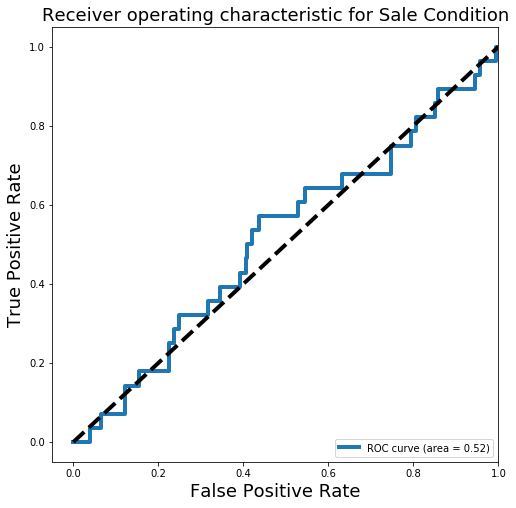

In [433]:
fpr , tpr, thresh = roc_curve(y2c_test, y_pp[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for Sale Condition', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### XGBoost classification model

In [391]:
xgbc = XGBClassifier() 
xgbc_params = {
    'n_estimators': [75, 100, 125],
    'max_depth': range(2,5)
    
}


xgbc_model = GridSearchCV(xgbc, param_grid=xgbc_params)
xgbc_model.fit(X2c_train, y2c_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [75, 100, 125], 'max_depth': range(2, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [392]:
xgbc = XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

xgbc.fit(X2c_train, y2c_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [393]:
pred_xgbc= xgbc.predict(Xtestss)

In [394]:
submission3 =test2[['Id']]
submission3['Sale Condition']= pred_xgbc
submission3.to_csv('xgbClassification.csv',index=False)

//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [395]:
submission3

,Id,Sale Condition
0,2658,0
1,2718,0
2,2414,0
3,1989,0
4,625,0
5,333,0
6,1327,0
7,858,0
8,95,0
9,1568,0


###  Construct the confusion matrix.

In [434]:
conmatrix_withfitting(Xc1,yc,xgbc )

0.920547945205
             precision    recall  f1-score   support

          0       0.92      1.00      0.96       337
          1       0.00      0.00      0.00        28

avg / total       0.85      0.92      0.89       365

     0  1
0  336  1
1   28  0


In [435]:
y_pp = xgbc.predict_proba(X2c_test)

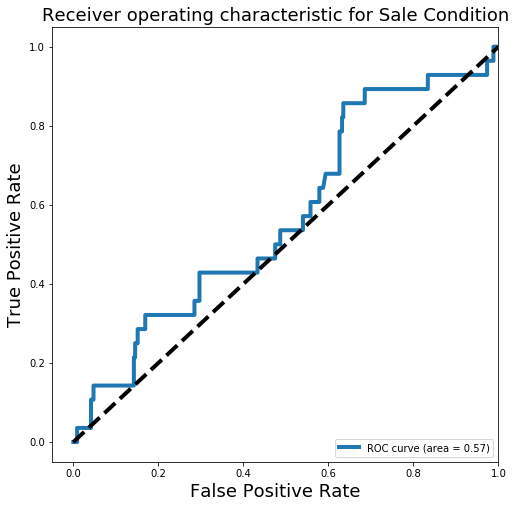

In [436]:
fpr , tpr, thresh = roc_curve(y2c_test, y_pp[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for Sale Condition', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [ ]:
# pipeline


In [ ]:
```# Dummies extractor class 
class DummiesExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column
                
    def transform(self, X, y=None):
        return pd.get_dummies(X[[self.column]], drop_first=True)
      
    def fit(self, X, y=None):
        return self 
    
# Multiple feature extractor class 
class Mult_feat_extract(BaseEstimator, TransformerMixin):
    def __init__ (self, columns):
        self.columns = columns 
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.columns]   
    
# making pipelines 
pipe_dum = make_pipeline(DummiesExtractor('Sale Type'))
mult_pipe = make_pipeline(Mult_feat_extract(['Lot Area','Gr Liv Area']))

# combining above pipelines with a feature union
feat_union = make_union(pipe_dum, mult_pipe)

# recombining everything into a pipeline called 'model' with a ridge model at the end. 
model = make_pipeline(feat_union, StandardScaler(), PCA() , Ridge())

#Grabbing my X and y - I don't actually have to drop saleprice for my X but I am out of habit. 
y = df['SalePrice'].values
X = df.drop('SalePrice', axis=1)

#fitting the model with my pipeline 
model.fit(X_train, y_train)

#getting a score from my trained model. 
#Great because the pipeline does all the feature manipulation of my x for me! 
print( 'My R2 score:', model.score(X_test, y_test))